<a href="https://colab.research.google.com/github/mayankjaiswal29/Projects/blob/main/EDA_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA on Retail Sales Data**

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Data**

In [2]:
df = pd.read_csv('https://github.com/mayankjaiswal29/Datasets/raw/main/retail_sales_dataset.csv')

### **Analysing/Cleaning Data**

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.shape

(1000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
df.duplicated('Customer ID').sum()

0

### **Calculating Basic Statistics**

In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
df.mode()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-05-16,CUST001,Female,43.0,Clothing,4.0,50.0,50.0
1,2,NaN,CUST002,NaN,64.0,NaN,NaN,NaN,NaN
2,3,NaN,CUST003,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,CUST004,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,CUST005,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
995,996,NaN,CUST995,NaN,NaN,NaN,NaN,NaN,NaN
996,997,NaN,CUST996,NaN,NaN,NaN,NaN,NaN,NaN
997,998,NaN,CUST997,NaN,NaN,NaN,NaN,NaN,NaN
998,999,NaN,CUST998,NaN,NaN,NaN,NaN,NaN,NaN


### **Time Series Analysis**

In [10]:
df['Month'] = df['Date'].str[5:7]

In [11]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,05


In [12]:
Ndf = df.groupby('Month').sum('Total Amount')
print(Ndf)

       Transaction ID   Age  Quantity  Price per Unit  Total Amount
Month                                                              
01              37728  3125       199           14645         36980
02              37699  3320       214           16255         44060
03              34712  3111       194           12620         28990
04              42755  3652       214           12715         33870
05              53821  4455       259           21255         53150
06              42262  3230       197           14210         36715
07              33398  2960       176           15295         35465
08              50579  4169       227           15465         36960
09              33756  2595       170            8895         23620
10              47163  3975       252           17475         46580
11              39202  3092       205           12960         34920
12              47425  3708       207           18100         44690


### **Sales Trend Over Time**

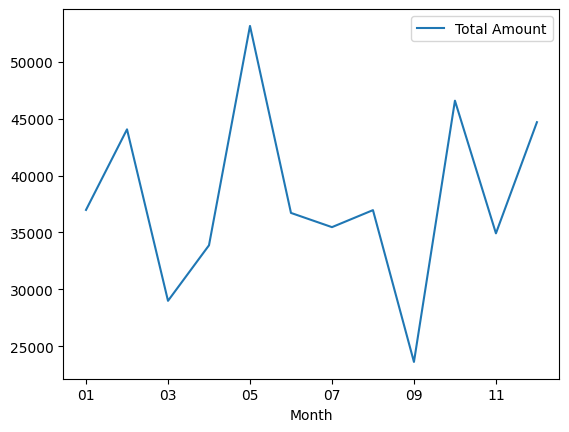

In [13]:
Ndf.plot( y="Total Amount", kind="line")
plt.show()

**Explanation :** The total sales was highest in May Month and lowest in September Month.

### **Customer Demographics and Purchasing Behavior**

In [14]:
Gdf = df['Gender'].value_counts()

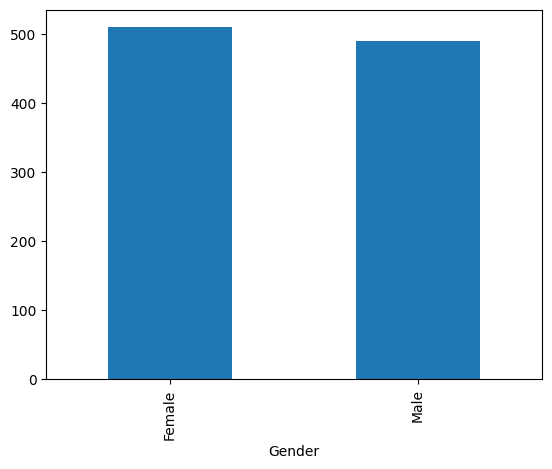

In [15]:
GP = Gdf.plot.bar()
plt.show()

**Explanation :** Female customers are tend to be higher then Male customers.

In [16]:
Pdf = df['Product Category'].value_counts()

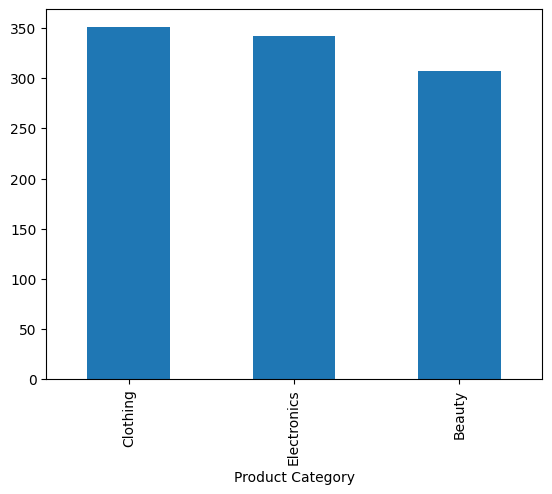

In [17]:
PP = Pdf.plot.bar()
plt.show()

**Explanation :** Clothing products are higher in sales regarding other products.

In [18]:
Adf = df['Age'].value_counts()

In [19]:
# Define the age ranges
age_ranges = [(10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70)]

# Define the age data
age_data = {
    33: 10, 58: 14, 44: 15, 36: 15, 24: 15, 37: 16, 29: 16, 53: 17, 59: 17, 45: 17,
    63: 17, 61: 18, 48: 18, 39: 18, 38: 19, 32: 19, 56: 19, 49: 19, 25: 20, 21: 20,
    19: 21, 20: 21, 55: 21, 18: 21, 28: 21, 41: 21, 35: 22, 31: 22, 26: 22, 30: 22,
    60: 22, 52: 22, 27: 23, 50: 23, 40: 24, 23: 24, 46: 25, 42: 26, 47: 26, 62: 27,
    22: 27, 54: 28, 34: 28, 51: 30, 57: 30, 64: 31, 43: 31
}

# Convert the age data into a pandas DataFrame
Adf = pd.DataFrame(list(age_data.items()), columns=['Age', 'Count'])

# Create a new column to store the age ranges
Adf['Age Range'] = pd.cut(Adf['Age'], bins=[x[0] for x in age_ranges] + [age_ranges[-1][1]], labels=[f"{x[0]}-{x[1]}" for x in age_ranges])

# Group by age range and sum the counts
grouped_data = Adf.groupby('Age Range')['Count'].sum().reset_index()

# Print the result
print(grouped_data)


  Age Range  Count
0     10-20     63
1     20-30    210
2     30-40    193
3     40-50    221
4     50-60    220
5     60-70     93


<Axes: >

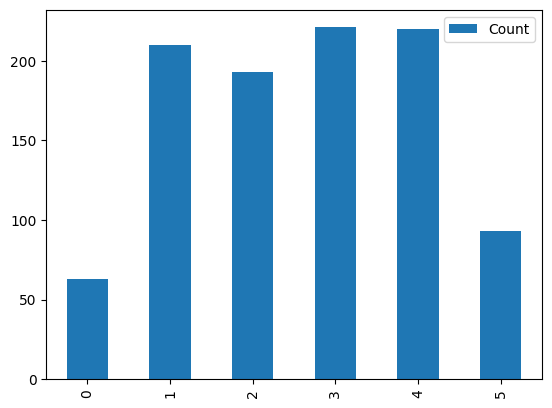

In [20]:
grouped_data.plot.bar()

**Explanation :** Age group of 40-60 are the most recurring customers.

### **Recommendations :**

*   Acccording to the analysis the sales trends are highest in month of May and also the the specific category of product (Clothing) is trending.

*   Focus on marketing efforts towards the 'Young Adult' segment as they constitute the largest customer base.
*   Introduce promotional offers or discounts on high-selling product categories like 'Clothing' to boost sales further.






